<a href="https://colab.research.google.com/github/rodrigoorf/mqtt_example/blob/master/mqtt_multiple_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Etapa 1 - Instalar a biblioteca Eclipse Paho MQTT Python
# Implementa as versões 3.1 e 3.1.1 do Protocolo MQTT

!pip install paho-mqtt

     |████████████████████████████████| 102kB 2.2MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.0-cp36-none-any.whl size=61415 sha256=46006f94a6468f5e067dd5adb435c858dc8bde56d2f0b09204584d8e1c915c81
  Stored in directory: /root/.cache/pip/wheels/02/94/6c/8474137cb7a5a3e001d70a22c8ff919caee69435376bccce79
Successfully built paho-mqtt


In [1]:
# Etapa 2 - Importar biblioteca do MQTT
import paho.mqtt.client as mqtt
import time

# Etapa 3 - Definir funções de Callback
# ---------------------------------------------------
# Função de Callback
# ---------------------------------------------------
# Quando o cliente recebe uma mensagem CONACK do Broker em resposta a conexão
# ele gera uma chamada de "callback" na função "on_connect()"

def on_connect(client, userdata, flags, rc):
  if rc == 0:
    print("Conectado com Sucesso (OK)")
    print("Código de Retorno da Conexão (RC): ", rc)
    print("Cliente: ", client)
    print("User Data: ", userdata)
  else:
    print("Problema de Conexão - Returned Code (RC) = ", rc)

# Descrições dos Códigos "RC"
# 0 - Connection successful
# 1 - Connection refused - incorrect protocol version
# 2 - Connection refused - invalid client identifier
# 3 - Connection refused - server unavailable
# 4 - Connection refused - bad username or password
# 5 - Connection refused - not authorized
# 6-255 - Currently unused

# ---------------------------------------------------
# Função de Callback
# ---------------------------------------------------
# Função chamada quando o cliente se desconecta do broker

def on_disconnect(client, userdata, rc):
  print("Desconectado - Result Code (RC) = ", rc)

# Criando broker e client
broker = "broker.hivemq.com"
#broker = "broker.mqttdashboard.com"

client = mqtt.Client(client_id="espec_iot_pucpr_rfreire")

# Associação das Funções de Callback
client.on_connect=on_connect
client.on_disconnect=on_disconnect

print("Conectando-se ao Broker: ", broker)
client.connect(broker, port=1883, keepalive=60)

client.loop_start()

# múltiplos tópicos
for i in range(2000):
  print("Medida 1 - Sala1: ", i, "\tMedida1 - Sala 2: ", 2 * i, "\tMedida 1 - Sala 3: ", 3*i)
  print("Medida 2 - Lab1: ", i / 2, "\tMedida1 - Lab2: ", i / 4, "\tMedida 2 - Lab3: ", i / 8)

  client.publish("espec_iot_pucpr/medida1/sala1_freire", i)
  client.publish("espec_iot_pucpr/medida1/sala2_freire", 2 * i)
  client.publish("espec_iot_pucpr/medida1/sala3_freire", 3 * i)

  client.publish("espec_iot_pucpr/medida2/lab1_freire", i / 2)
  client.publish("espec_iot_pucpr/medida2/lab2_freire", i / 4)
  client.publish("espec_iot_pucpr/medida2/lab3_freire", i / 8)

  time.sleep(1)

client.loop_stop()
client.disconnect()

# Para validar o funcionamento, é possível baixar um cliente MQTT para dispositivos Android/iOS
# Basta adicionar o tópico, porta e URL do Broker que as mensagens que forem enviadas por aqui serão recebidas no app
# Usei o MyMQTT para Android para fins de teste

Conectando-se ao Broker:  broker.hivemq.com
Medida 1 - Sala1:  0 	Medida1 - Sala 2:  0 	Medida 1 - Sala 3:  0
Medida 2 - Lab1:  0.0 	Medida1 - Lab2:  0.0 	Medida 2 - Lab3:  0.0
Conectado com Sucesso (OK)
Código de Retorno da Conexão (RC):  0
Cliente:  <paho.mqtt.client.Client object at 0x7f7e6f03df98>
User Data:  None
Medida 1 - Sala1:  1 	Medida1 - Sala 2:  2 	Medida 1 - Sala 3:  3
Medida 2 - Lab1:  0.5 	Medida1 - Lab2:  0.25 	Medida 2 - Lab3:  0.125
Desconectado - Result Code (RC) =  1
Medida 1 - Sala1:  2 	Medida1 - Sala 2:  4 	Medida 1 - Sala 3:  6
Medida 2 - Lab1:  1.0 	Medida1 - Lab2:  0.5 	Medida 2 - Lab3:  0.25
Medida 1 - Sala1:  3 	Medida1 - Sala 2:  6 	Medida 1 - Sala 3:  9
Medida 2 - Lab1:  1.5 	Medida1 - Lab2:  0.75 	Medida 2 - Lab3:  0.375
Conectado com Sucesso (OK)
Código de Retorno da Conexão (RC):  0
Cliente:  <paho.mqtt.client.Client object at 0x7f7e6f03df98>
User Data:  None
Medida 1 - Sala1:  4 	Medida1 - Sala 2:  8 	Medida 1 - Sala 3:  12
Medida 2 - Lab1:  2.0 	Medi

KeyboardInterrupt: ignored

Aqui um exemplo recebendo alguns dos pacotes pelo aplicativo no celular:

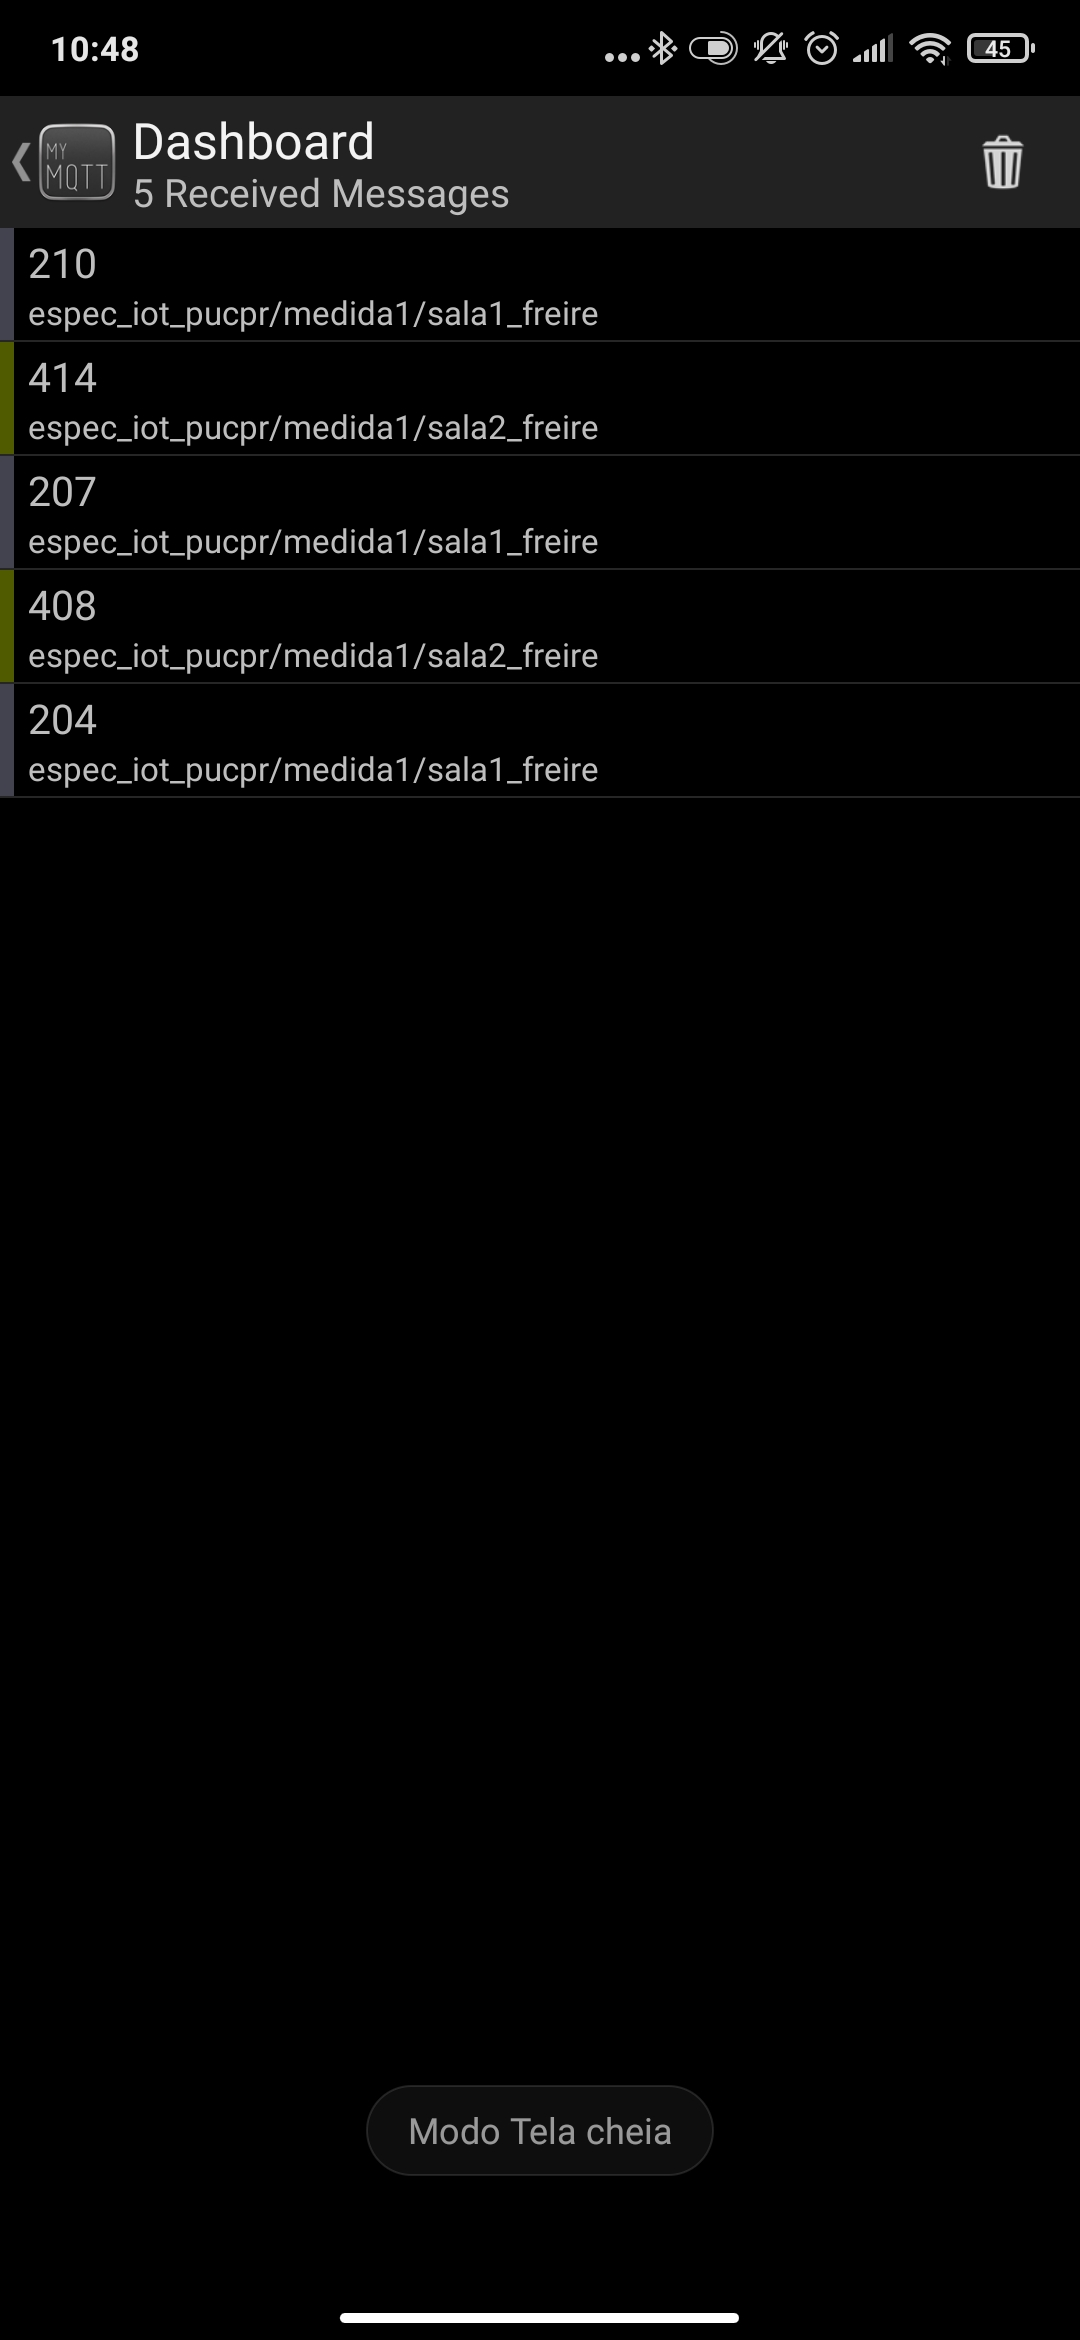